C:\Users\t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


weights:  [0.50061126 0.49938874]
means:  [[-0.32799671]
 [ 5.00117838]]
variances:  [1.57693437 0.66636657]


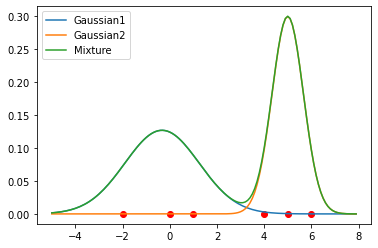

In [1]:
##################################################
# Gaussian Mixture example (1D)
#=================================================

# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import os
os.environ['OMP_NUM_THREADS'] = "1"

# data
X = np.array([[-2.0], [0.0], [1.0], [4.0], [5.0], [6.0]]) # need to be 2D array

# manually initialize the parameters
n_components = 2
weights = np.array([0.5, 0.5]) 
means = np.array([[5.0], [6.0]]) # need to be 2D array
covariances = np.array([1.0, 8.0]) 

# create the Gaussian mixture model with the initialized parameters
gmm = GaussianMixture(n_components=n_components, covariance_type='spherical')
gmm.weights_ = weights
gmm.means_ = means
gmm.covariances_ = covariances

# fit the model to the data
gmm.fit(X)

# print the learned parameters
print("weights: ", gmm.weights_)
print("means: ", gmm.means_)
print("variances: ", gmm.covariances_)

# plot PDFs
fig, ax = plt.subplots()
x = np.arange(-5, 8, 0.1)
mixture = np.zeros(x.shape)
for i in range(len(gmm.weights_)):
    weight = gmm.weights_[i]
    mu = gmm.means_[i]
    variance = gmm.covariances_[i]
    pdf = weight * norm.pdf(x, mu, variance)
    label = "Gaussian" + str(i+1)
    ax.plot(x, pdf, label=label)
    mixture += pdf
ax.plot(x, mixture, label='Mixture' )
ax.scatter(X, len(X)*[0], c='r')
ax.legend()
plt.show()


C:\Users\t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


weights:  [0.58760454 0.41239546]
means:  [[4.37833043 3.69284671]
 [0.29785077 0.16723915]]
variances:  [1.60142367 3.46075895]


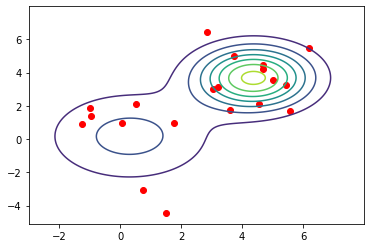

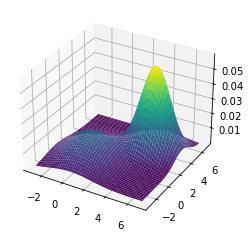

In [2]:
##################################################
# Gaussian Mixture example (2D)
#=================================================

# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from scipy.stats import multivariate_normal
import os
os.environ['OMP_NUM_THREADS'] = "1"

# generate sample points X
n_points = 10
mu1 = [0, 0]
mu2 = [4, 4]
cov1 = [[4, 0], [0, 4]]
cov2 = [[1, 0], [0, 1]]

points1 = np.random.multivariate_normal(mu1, cov1, n_points) # ~ N(mu1, cov1)
points2 = np.random.multivariate_normal(mu2, cov2, n_points) # ~ N(mu2, cov2)
X = np.concatenate([points1, points2])


# manually initialize the parameters
weights = np.array([0.5, 0.5]) 
means = np.array([[4.0, 3.0], [0.0, 0.0]]) # need to be 2D array
covariances = np.array([5.0, 1.0]) 

# create the Gaussian mixture model with the initialized parameters
n_components = 2
gmm = GaussianMixture(n_components=n_components, covariance_type='spherical')
gmm.weights_ = weights
gmm.means_ = means
gmm.covariances_ = covariances

# fit the model to the data
gmm.fit(X)

# print the learned parameters
print("weights: ", gmm.weights_)
print("means: ", gmm.means_)
print("variances: ", gmm.covariances_)

#######################################
# coutour plot
#======================================

# Create grid of points to evaluate PDF
x, y = np.mgrid[-3:8:.01, -3:8:.01]
pos = np.dstack((x, y))
mixture = np.zeros(x.shape)

# Plot PDFs as as a contour lines
fig, ax = plt.subplots()
for i in range(len(gmm.weights_)):
    weight = gmm.weights_[i]
    mu = gmm.means_[i]
    variance = gmm.covariances_[i]
    rv = multivariate_normal(mu, variance)
    pdf = weight * rv.pdf(pos)
    label = "Gaussian" + str(i+1)
    mixture += pdf
ax.contour(x, y, mixture)
x, y = X.T
ax.scatter(x, y, c='r')
plt.show()


#######################################
# 3D plot
#======================================

# Create a 2D grid of points
x, y = np.mgrid[-3:7:.1, -3:7:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
mixture = np.zeros(x.shape)

# Create 3D plots
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
for i in range(len(gmm.weights_)):
    weight = gmm.weights_[i]
    mu = gmm.means_[i]
    variance = gmm.covariances_[i]
    z = multivariate_normal.pdf(pos, mean=mu, cov=variance) * weight
    pdf = weight * rv.pdf(pos)
    label = "Gaussian" + str(i+1)
    mixture += z
ax2.plot_surface(x, y, mixture, cmap='viridis', label='mixture')

